In [1]:
# import sys
# print(sys.executable)


In [2]:
# !cd C:\Users\yash\Desktop\Project\Scrape_data
# !.\airline-env\Scripts\activate


In [3]:
# !pwd

In [4]:
# pip install vaderSentiment

# !pip install nltk scikit-learn

# pip install tensorflow
# !pwd

# !{sys.executable} -m pip install nltk scikit-learn
# !{sys.executable} -m pip install scikit-learn
# !{sys.executable} -m pip install xgboost



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification ,pipeline
import torch
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json

C:\Users\yash\Desktop\Project\Scrape_data\airline-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# nltk.download('vader_lexicon')

In [7]:
# pwd

In [8]:
df=pd.read_csv('./DATA/airline_tweets.csv')

In [9]:
len(df)

14640

In [10]:
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [11]:
list(df.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

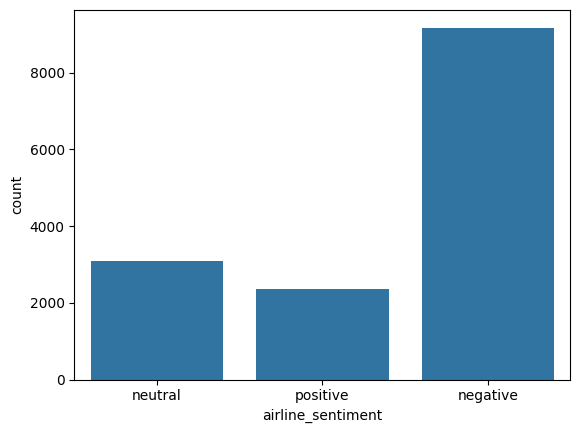

In [12]:
if __name__ == '__main__':
    
    sns.countplot(data=df,x="airline_sentiment")

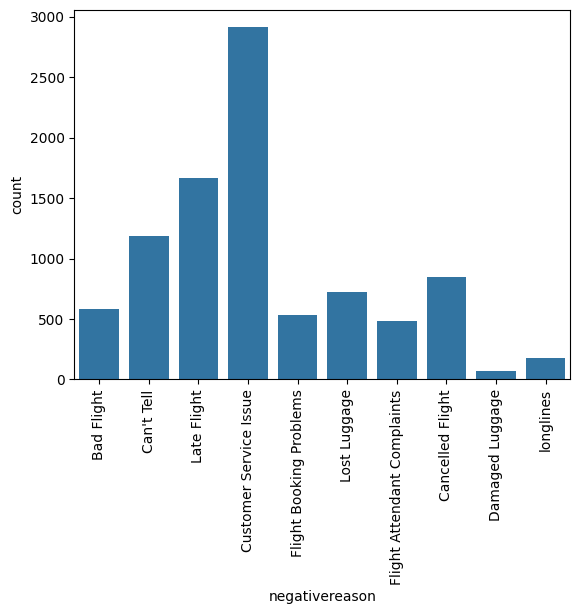

In [13]:
if __name__ == '__main__':
    
    sns.countplot(data=df,x="negativereason")
    plt.xticks(rotation=90)

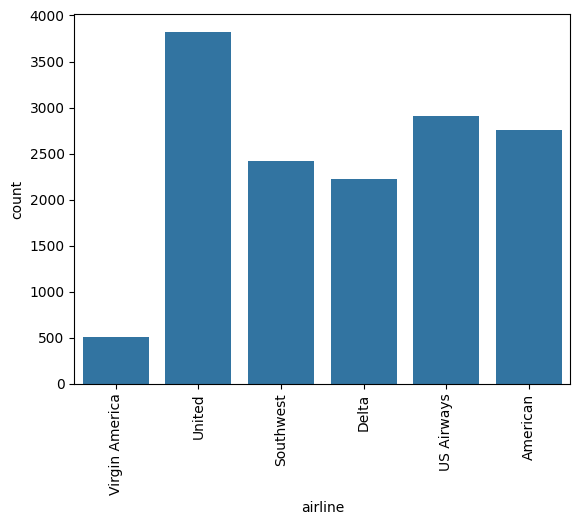

In [14]:
if __name__ == '__main__':
    sns.countplot(data=df,x="airline")
    plt.xticks(rotation=90)


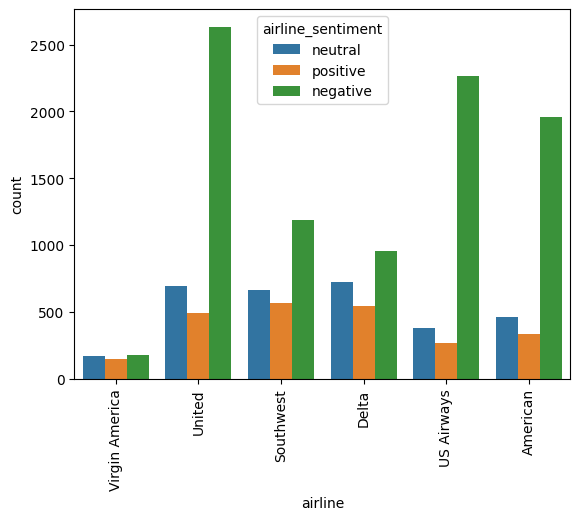

In [15]:
if __name__ == '__main__':
    sns.countplot(data=df,x="airline",hue="airline_sentiment")
    plt.xticks(rotation=90)

In [16]:
data=df[["airline_sentiment","text"]]

In [17]:
data

airline_sentiment                                               text
0               neutral                @VirginAmerica What @dhepburn said.
1              positive  @VirginAmerica plus you've added commercials t...
2               neutral  @VirginAmerica I didn't today... Must mean I n...
3              negative  @VirginAmerica it's really aggressive to blast...
4              negative  @VirginAmerica and it's a really big bad thing...
...                 ...                                                ...
14635          positive  @AmericanAir thank you we got on a different f...
14636          negative  @AmericanAir leaving over 20 minutes Late Flig...
14637           neutral  @AmericanAir Please bring American Airlines to...
14638          negative  @AmericanAir you have my money, you change my ...
14639           neutral  @AmericanAir we have 8 ppl so we need 2 know h...

[14640 rows x 2 columns]

In [18]:
X=data['text']
text = [' '.join(review.split(' ')[1:]) for review in data['text']]
labels = df['airline_sentiment'].tolist()
# X_trail = [rev.strip('"').strip('“').strip('”') for rev in X_trail]

In [19]:
len(labels)

14640

In [20]:
y=data['airline_sentiment']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf=TfidfVectorizer(stop_words='english')

In [25]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [26]:
X_train_tfidf=tfidf.transform(X_train)

In [27]:
X_test_tfidf=tfidf.transform(X_test)

In [28]:
from sklearn.svm import LinearSVC

linear_svc=LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [29]:
if __name__ == '__main__':
    
    from sklearn.naive_bayes import MultinomialNB
    nb = MultinomialNB()
    nb.fit(X_train_tfidf,y_train)
    
    
    from sklearn.linear_model import LogisticRegression
    log_modal=LogisticRegression(max_iter=1000)
    log_modal.fit(X_train_tfidf,y_train)
    
    
    from sklearn.svm import SVC
    rbf_svc=SVC()
    rbf_svc.fit(X_train_tfidf,y_train)
    
    
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier()
    dt.fit(X_train_tfidf,y_train)
    
    
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_tfidf,y_train)
    
    
    from xgboost import XGBClassifier
    label_encoder = LabelEncoder()
    y_train_enc = label_encoder.fit_transform(y_train)
    xgb = XGBClassifier(objective='multi:softmax', num_class=3)
    xgb.fit(X_train_tfidf,y_train_enc)

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [31]:
def report(model):

    if __name__ =="__main__":

        preds=model.predict(X_test_tfidf)

        if model == xgb:
            preds = label_encoder.inverse_transform(preds)

        print(classification_report(y_test,preds))

        cm=confusion_matrix(y_test,preds)
        disp=ConfusionMatrixDisplay(cm,display_labels=['negative','neutral','positive'])
        disp.plot()

Naive Bayes

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



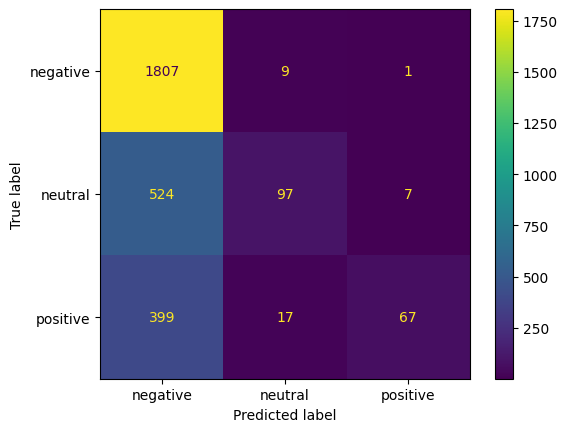

In [32]:
if __name__ == '__main__':
    
    print('Naive Bayes\n')
    report(nb)

Logistic Model

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



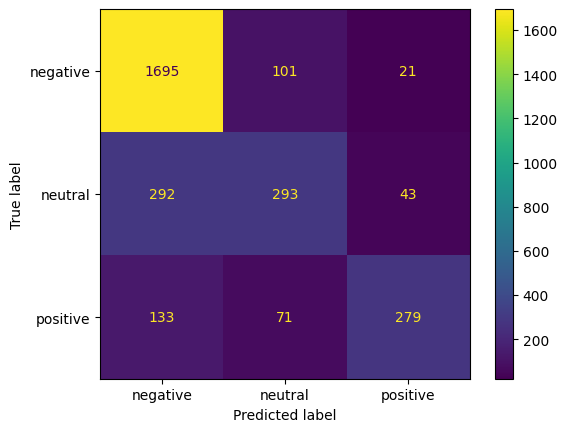

In [33]:
if __name__ == '__main__':
    
    print('Logistic Model\n')
    report(log_modal)

Radial SVC

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



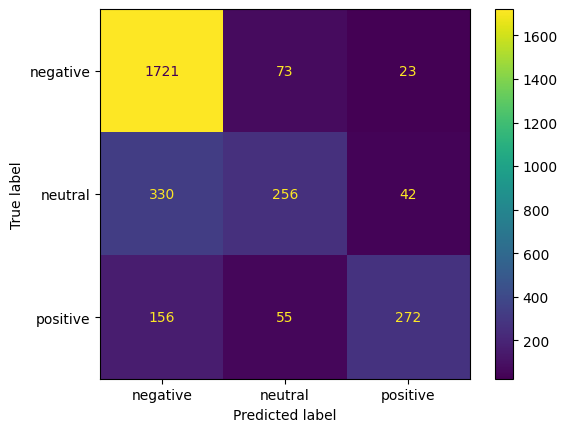

In [34]:
if __name__ == '__main__':
    
    print('Radial SVC\n')
    report(rbf_svc)

Linear SVC

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



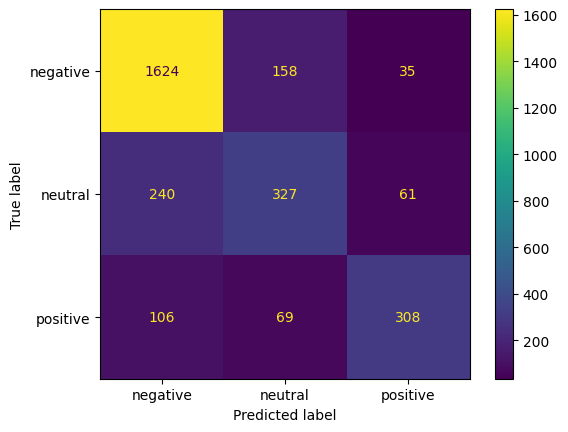

In [35]:
if __name__ == '__main__':   
    
    print('Linear SVC\n')
    report(linear_svc)

Decision Tree

              precision    recall  f1-score   support

    negative       0.76      0.78      0.77      1817
     neutral       0.40      0.38      0.39       628
    positive       0.56      0.54      0.55       483

    accuracy                           0.66      2928
   macro avg       0.57      0.57      0.57      2928
weighted avg       0.65      0.66      0.65      2928



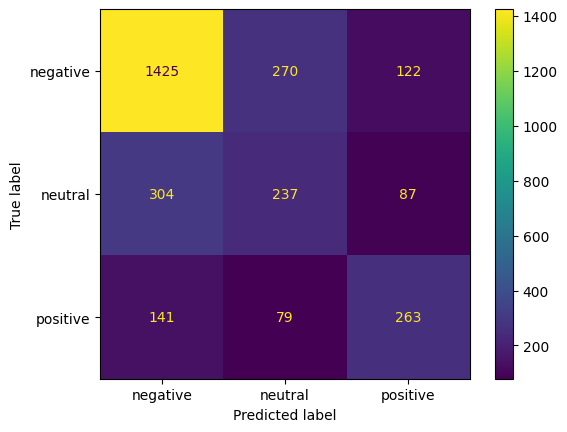

In [36]:
if __name__ == '__main__':    
    
    print('Decision Tree\n')
    report(dt)

Random Forests

              precision    recall  f1-score   support

    negative       0.76      0.94      0.84      1817
     neutral       0.60      0.36      0.45       628
    positive       0.77      0.51      0.61       483

    accuracy                           0.74      2928
   macro avg       0.71      0.60      0.64      2928
weighted avg       0.73      0.74      0.72      2928



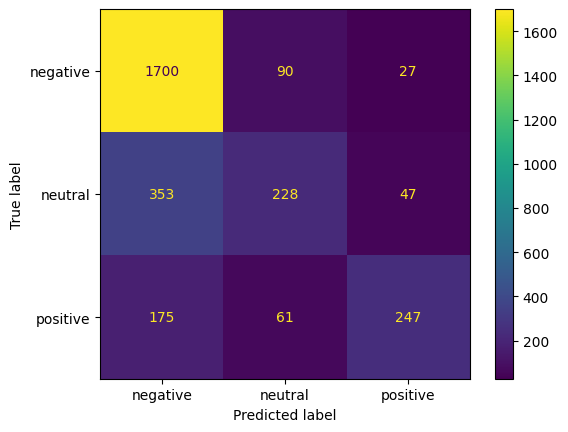

In [37]:
if __name__ == '__main__':    
    
    print('Random Forests\n')
    report(rf)

XG Boost

              precision    recall  f1-score   support

    negative       0.78      0.92      0.85      1817
     neutral       0.58      0.38      0.46       628
    positive       0.74      0.59      0.66       483

    accuracy                           0.75      2928
   macro avg       0.70      0.63      0.65      2928
weighted avg       0.73      0.75      0.73      2928



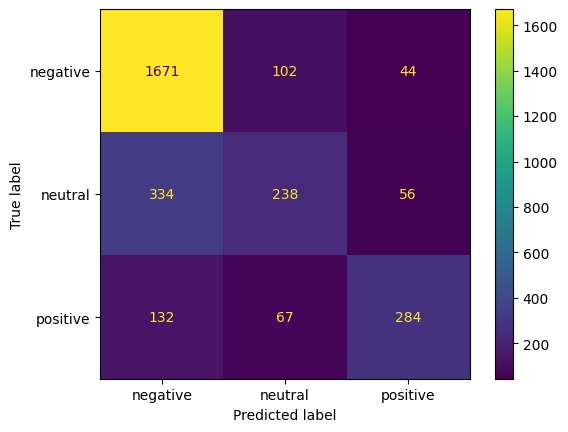

In [38]:
if __name__ == '__main__':   
    
    print('XG Boost\n')
    report(xgb)

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [41]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [42]:
def predict_svc(reviews_pd):
   return pd.DataFrame({'labels':[pipe.predict([str(review)])[0] for review in reviews_pd]})

In [43]:
# pwd

In [44]:
sia = SentimentIntensityAnalyzer()

In [45]:
def predict_sia(text):

    score = sia.polarity_scores(text)['compound']
    # print(score)

    if score > 0.05:
        return 'positive'

    elif score < -0.05:
        return 'negative'

    else:
        return 'neutral'

In [46]:
def get_category(reviews):
    
    categories_keywords = {
        
        "Food & Beverages": [
            "food", "meal", "drink", "beverage", "snack", "dining", "menu", "breakfast", "lunch", "dinner", "catering"
        ],
        "Inflight Entertainment": [
            "entertainment", "tv", "screen", "movie", "music", "headphones", "games", "streaming"
        ],
        "Seat Comfort": [
            "seat", "comfort", "legroom", "cushion", "space", "recline", "cramped", "old seat", "broken seat", "armrest"
        ],
        "Staff Behaviour": [
            "service", "attendant", "crew", "hospitality", "rude", "helpful", "support", "polite", "unprofessional", "assistance","staff"
        ],
        "Value for Money": [
            "expensive", "cheap", "value", "worth", "price", "affordable", "cost", "overpriced", "budget", "reasonable"
        ],
        "Punctuality": [
            "delay", "late", "punctual", "schedule", "timely", "on time", "missed flight", "waiting", "reschedule", "boarding time"
        ],
        "Hygiene": [
            "clean", "dirty", "hygiene", "tidy", "sanitation", "filthy", "smell", "messy", "neat", "maintenance"
        ],
        "Wi-Fi & Connectivity": [
            "wifi", "internet", "connection", "connectivity", "slow", "no signal", "network", "online", "streaming"
        ],
        "Cabin Environment": [
            "temperature", "air", "cabin", "smell", "noise", "lighting", "humidity", "environment", "hot", "cold"
        ],
        "Baggage Policies": [
            "baggage", "luggage", "storage", "overweight", "policy", "lost", "damaged", "extra charge", "carry-on", "handling"
        ],
        "Ticket Booking & Pricing": [
            "booking", "ticket", "reservation", "price", "refund", "change", "cancellation", "confirmation", "upgrade", "payment"
        ],
        "Customer Service": [
            "customer service", "support", "complaint", "inquiry", "assistance", "call center", "helpline", "resolution", "feedback", "response"
        ],
        "Flight Cancellation": [
            "cancellation", "rebooking", "denied boarding", "missed flight", "no show", "change of plans", "reschedule"
        ],
        "Aircraft Maintenance": [
            "aircraft", "plane", "maintenance", "condition", "old", "broken", "dirty", "outdated", "repair", "safety"
        ],
        "Compensation & Refund": [
            "compensation", "refund", "money back", "claim", "reimbursement", "denied", "refusal", "settlement", "payment", "guarantee"
        ],
        "Security Concerns": [
            "safety", "security", "incident", "emergency", "risk", "unsafe", "danger", "fear", "scary", "accident"
        ],
        "Process & Policy": [
             "policy", "procedure", "unclear", "confusing", "rules", "regulations", "miscommunication", "unaware", "wrong charge"
        ],
        "Brand Reputation": [
            "brand", "reputation", "worst", "terrible", "horrible", "disgrace", "shame", "complaint", "never again", "avoid"
        ],
        "Accessibility Needs": [
            "wheelchair", "accessibility", "disabled", "special needs", "assistance", "support", "accommodation", "priority", "service animal", "elderly support"
        ],
        "Boarding Process": [
            "check-in", "boarding", "process", "line", "queue", "slow", "waiting", "boarding gate", "boarding pass", "staff at check-in"
        ],
        "In-flight Experience": [
            "in-flight", "experience", "comfort", "food", "entertainment", "service", "crew", "ambience", "cabin environment"
        ],
        "Miscellaneous": [
            "general feedback", "overall experience", "mixed feelings", "average", "neutral", "satisfactory", "okay", "nothing special"
        ]
    }

    review_categories = []
    for review in reviews:
        
        categories_matched = []
        for category, keywords in categories_keywords.items():
            if any(keyword in review.lower() for keyword in keywords):
                categories_matched.append(category)
        review_categories.append(','.join(categories_matched) if categories_matched else "Miscellaneous")
        # review_categories.append(categories_matched if categories_matched else "Miscellaneous")

    return pd.Series(review_categories)

In [47]:
# Load model, tokenizer, label encoder


def predict_label_bert(series_of_texts):


    model = BertForSequenceClassification.from_pretrained("saved_model/")
    tokenizer = BertTokenizer.from_pretrained("saved_model/")
    
    with open("saved_model/label_encoder.pkl", "rb") as f:
        label_encoder = pickle.load(f)
    
    # Move to CPU (or GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    # Tokenize the entire series
    encodings = tokenizer(series_of_texts.tolist(), return_tensors="pt", truncation=True,
                          padding=True, max_length=128).to(device)

    # Predict in no-grad mode
    with torch.no_grad():
        outputs = model(**encodings)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
    
    # Decode labels
    return pd.Series(label_encoder.inverse_transform(preds), index=series_of_texts.index)



In [48]:

def predict_label_bert_123(series_of_texts):
    # Load the model and tokenizer
    model = BertForSequenceClassification.from_pretrained("saved_model_label/")
    tokenizer = BertTokenizer.from_pretrained("saved_model_label/")
    
    # Load the label encoder
    with open("saved_model_label/label_encoder.pkl", "rb") as f:
        label_encoder = pickle.load(f)
    
    # Ensure label_encoder is a LabelEncoder instance with valid classes
    if isinstance(label_encoder, np.ndarray):
        le_temp = LabelEncoder()
        le_temp.classes_ = label_encoder
        label_encoder = le_temp
    
    # Device setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    # Tokenize the input texts
    encodings = tokenizer(series_of_texts.tolist(), return_tensors="pt", truncation=True,
                          padding=True, max_length=128).to(device)
    
    # Get predictions
    with torch.no_grad():
        outputs = model(**encodings)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
    
    try:
        decoded_labels = label_encoder.inverse_transform(preds)
    except Exception as e:
        print(f"Error during inverse_transform: {e}")
        return None
    
    return pd.Series(decoded_labels, index=series_of_texts.index)


In [50]:
# Load saved tokenizer, model, and label classes
model_dir = "saved_model_category"

tokenizer = BertTokenizer.from_pretrained(model_dir)
model = BertForSequenceClassification.from_pretrained(model_dir)
model.eval()

with open(f"{model_dir}/label_classes.json", "r") as f:
    label_classes = json.load(f)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


def predict_category_bert(series, threshold=0.5, batch_size=16):
    model.eval()
    predictions = []

    for i in range(0, len(series), batch_size):
        batch_texts = series.iloc[i:i+batch_size].tolist()
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=256)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            logits = model(**inputs).logits
            probs = torch.sigmoid(logits)

        for prob_vector in probs:
            predicted_indices = (prob_vector >= threshold).nonzero(as_tuple=True)[0].tolist()
            if predicted_indices:
                predicted_labels = [label_classes[i] for i in predicted_indices]
            else:
                predicted_labels = ["Miscellaneous"]
            predictions.append(predicted_labels)

    return pd.Series(predictions, index=series.index)
